In [115]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
data_df = pd.read_csv('./source/Dataset/cardio_data.csv')

In [117]:
#data_df.head()

In [118]:
#len(data_df)

In [119]:
#print(data_df.info())

Correcting the data type

In [120]:
data_df['date'] = pd.to_datetime(data_df['date'], format="%d-%m-%Y")
#data_df.dtypes

In [121]:
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values for column '{column}': {unique_values}")

In [122]:
data_df['age_years'] = data_df['age'] / 365
data_df['age_years'] = data_df['age_years'].astype(int)
data_df.drop(columns=['age'], inplace=True)


data_df['bmi'] = data_df['weight'] / ((data_df['height'] / 100) **2)

In [123]:
#TO CHECK age_years for <20 and >60
data_df['age_years'].describe()


count    70000.000000
mean        52.840671
std          6.766774
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age_years, dtype: float64

In [124]:
def populates_agebinned_columns(category_age, df):
    for cat in category_age:
        df[f'age_binned_{cat}'] = 0
        df.loc[df['age_binned'] == cat, f'age_binned_{cat}'] = 1

    return df
  

#further categoried the age group
bin_age = [19, 29, 39, 49, 59, 69]
category_age = ['20s', '30s', '40s', '50s', '60s']
data_df['age_binned'] = pd.cut(data_df['age_years'], bins=bin_age, labels=category_age)
#df_drug = df_drug.drop(['Age'], axis = 1)

data_df = populates_agebinned_columns(category_age, data_df)
data_df.drop(columns=['age_years','age_binned'], axis=1, inplace=True)


In [125]:
#Drop it first, to change the top codes!!!
data_df.columns
#data_df.drop(columns=['age_binned_<20s','age_binned_>60s'], inplace=True)


Index(['date', 'country', 'id', 'active', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight', 'disease', 'bmi', 'age_binned_20s', 'age_binned_30s',
       'age_binned_40s', 'age_binned_50s', 'age_binned_60s'],
      dtype='object')

In [126]:
#Further binning Blood Pressure
#data_df.ap_hi.describe()

In [127]:
def populate_bplevels_columns(df):

    #x = 0
    for x in range(len(df)):
        #print(df.ap_hi[x])

        if df.ap_hi[x] < 120 and df.ap_lo[x] < 80:
            df.loc[x, 'bp_normal'] = 1
        elif df.ap_hi[x] < 129 and df.ap_lo[x] < 80:
            df.loc[x, 'bp_elevated'] = 1
        elif df.ap_hi[x] < 139 or df.ap_lo[x] < 89:
            df.loc[x, 'bp_hypertension1'] = 1
        else:
            df.loc[x, 'bp_hypertension2'] = 1
    
    return df

    #print(df.ap_hi[1])


#data_df.drop(columns=['bp_normal','bp_elevated','bp_hypertension1','bp_hypertension2'])        

data_df['bp_normal'] = 0
data_df['bp_elevated'] = 0
data_df['bp_hypertension1'] = 0
data_df['bp_hypertension2'] = 0


data_df = populate_bplevels_columns(data_df)

data_df.drop(columns=['ap_hi', 'ap_lo'], inplace=True)


In [128]:
bp_df = data_df[['bp_normal', 'bp_elevated', 'bp_hypertension1', 'bp_hypertension2']]

show_unique_values(bp_df)

Unique values for column 'bp_normal': [0 1]
Unique values for column 'bp_elevated': [0 1]
Unique values for column 'bp_hypertension1': [1 0]
Unique values for column 'bp_hypertension2': [0 1]


In [129]:
#data_df = data_df[data_df['bmi']< 100]

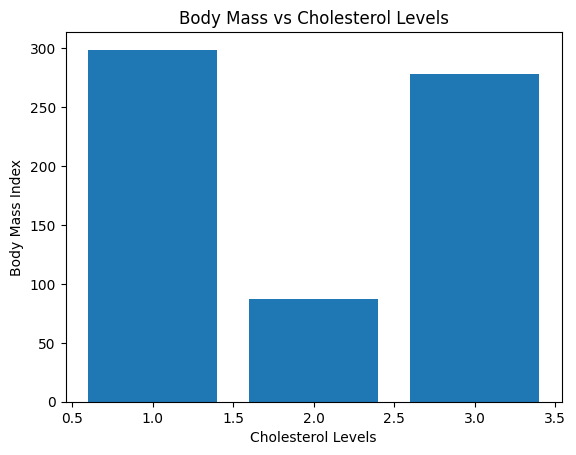

In [130]:
cholesterol_levels = data_df['cholesterol']
bmi_values = data_df['bmi']

bars = plt.bar(cholesterol_levels, bmi_values, label="bmi")
plt.xlabel('Cholesterol Levels')
plt.ylabel('Body Mass Index')
plt.title("Body Mass vs Cholesterol Levels")

plt.show()

Hypothesis for gender: Male usually are taller and weights  more than Female. Thus, assumption is that Gender(1=F, 0=M)
Cholestrol level: 1=LOW, 2=MEDIUM, 3=HIGH

FINDINGS
The relationship between BMI (Body Mass Index) and cholesterol levels can vary based on various factors including genetics, diet, lifestyle, and overall health. While there's no direct correlation between BMI and cholesterol levels, it's possible for someone to have a high BMI but low cholesterol and vice versa.

In [131]:
# Create bar chart
#plt.bar(data_df.country, data_df.disease)

# Group by Country and sum occurrences of disease value 1
counts = data_df[data_df['disease'] == 1].groupby('occupation').size()
counts.sort_values(ascending=False)
# Plotting the bar chart
#counts.plot(kind='bar')

# Add labels and title
#plt.xlabel('Occupation')
#plt.ylabel('Disease Count')
#plt.title('Bar Chart Example')

# Adding country names as legends
#plt.legend(labels=counts.index, title='Occupation')

# Show the plot
#plt.show()

occupation
Accountant    4009
Nurse         3937
Architect     3932
Others        3911
Lawyer        3891
Teacher       3868
Chef          3823
Doctor        3808
Engineer      3800
dtype: int64

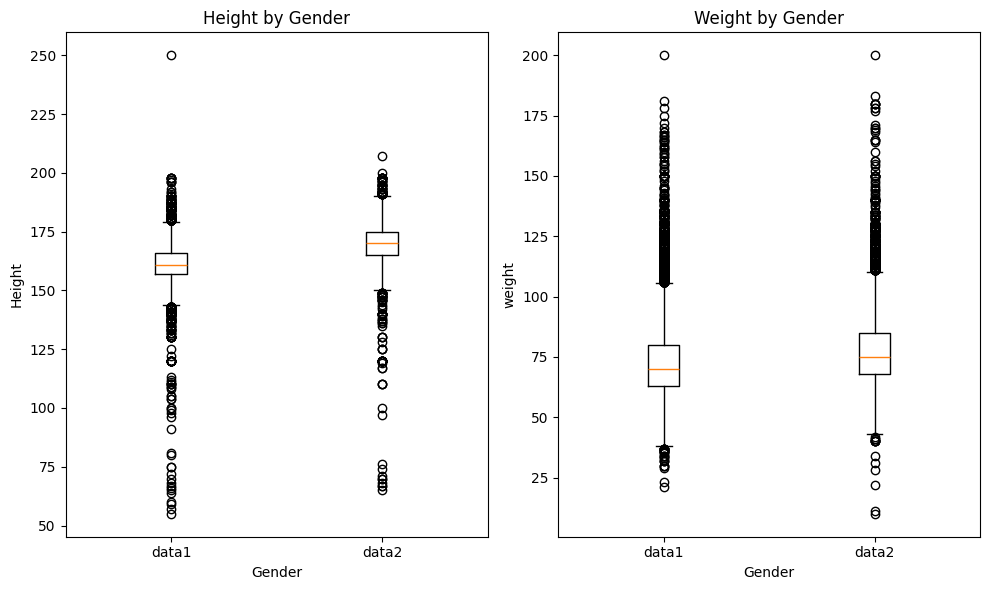

In [132]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot([data_df[data_df['gender'] == 1]['height'], data_df[data_df['gender'] == 2]['height']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title("Height by Gender")

plt.subplot(1, 2, 2)
plt.boxplot([data_df[data_df['gender'] == 1]['weight'], data_df[data_df['gender'] == 2]['weight']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('weight')
plt.title("Weight by Gender")

plt.tight_layout()
plt.show()

To the fact that typically Males are heavier and taller than Females.Thus 'data1' is deemed to be females and 'data2' is males.

Another point is, there are many outliers shown above. That may result positive or negative impact to the ML model which shall be addressed later.

In [133]:
#define the gender
data_df['gender_male'] = 0
data_df['gender_female'] = 0

data_df.loc[data_df['gender'] == 1, 'gender_female'] = 1
data_df.loc[data_df['gender'] == 2, 'gender_male'] = 1

data_df.drop('gender', axis=1, inplace=True)


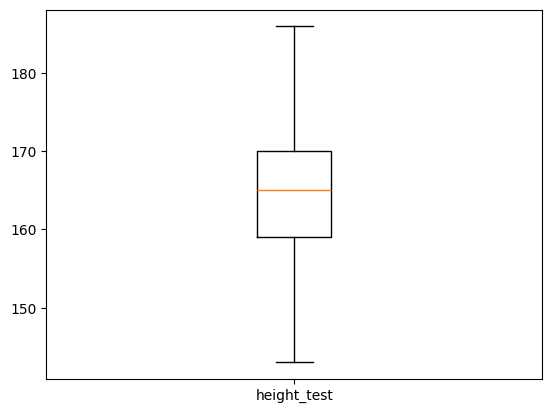

In [134]:
#Try to workout with the outliers
q1 = data_df['height'].quantile(0.25)
q3 = data_df['height'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for acceptable values
threshold_lower = q1 - 1.5 * iqr
threshold_upper = q3 + 1.5 * iqr

# Identify outliers in the 'height' column
outliers = data_df[(data_df['height'] < threshold_lower) | (data_df['height'] > threshold_upper)]

# Exclude outliers from the dataset, but keep those within the threshold range
filtered_data1 = data_df[(data_df['height'] >= threshold_lower) & (data_df['height'] <= threshold_upper)]

plt.boxplot(filtered_data1['height'], labels=['height_test'])
plt.show()


In [135]:
data_df = filtered_data1

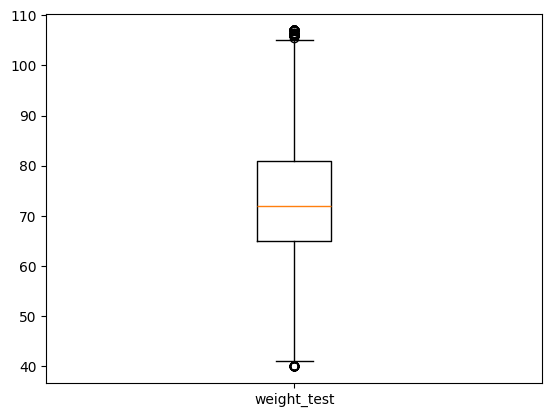

In [136]:

#Try to workout with the outliers
q1 = data_df['weight'].quantile(0.25)
q3 = data_df['weight'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for acceptable values
threshold_lower = q1 - 1.5 * iqr
threshold_upper = q3 + 1.5 * iqr

# Identify outliers in the 'height' column
outliers = data_df[(data_df['weight'] < threshold_lower) | (data_df['weight'] > threshold_upper)]

# Exclude outliers from the dataset, but keep those within the threshold range
filtered_data2 = data_df[(data_df['weight'] >= threshold_lower) & (data_df['weight'] <= threshold_upper)]

plt.boxplot(filtered_data2['weight'], labels=['weight_test'])
plt.show()


In [137]:
data_df = filtered_data2

In [138]:
#define the cholesterol leves
data_df['cholesterol_high'] = 0
data_df['cholesterol_medium'] = 0
data_df['cholesterol_low'] = 0

data_df.loc[data_df['cholesterol'] == 1, 'cholesterol_low'] = 1
data_df.loc[data_df['cholesterol'] == 2, 'cholesterol_medium'] = 1
data_df.loc[data_df['cholesterol'] == 3, 'cholesterol_high'] = 1

data_df.drop('cholesterol', axis=1, inplace=True)



/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_3438/846695732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['cholesterol_high'] = 0
/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_3438/846695732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['cholesterol_medium'] = 0
/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_3438/846695732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [139]:
#define the gluc leves
data_df['gluc_high'] = 0
data_df['gluc_medium'] = 0
data_df['gluc_low'] = 0

data_df.loc[data_df['gluc'] == 1, 'gluc_low'] = 1
data_df.loc[data_df['gluc'] == 2, 'gluc_medium'] = 1
data_df.loc[data_df['gluc'] == 3, 'gluc_high'] = 1

data_df.drop('gluc', axis=1, inplace=True)


/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_3438/2906137593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['gluc_high'] = 0
/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_3438/2906137593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['gluc_medium'] = 0
/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_3438/2906137593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [140]:
country_mapping_dict = {'Indonesia': 0, 
                        'Malaysia': 1,
                        'Singapore' : 2,
                        'India' : 3}

# Map values in columnA using the mapping dictionary
data_df['country_num'] = data_df['country'].map(country_mapping_dict)

#data_df[['country', 'country_num']].drop_duplicates()
data_df.drop('country', axis=1, inplace=True)

/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_3438/3430328761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['country_num'] = data_df['country'].map(country_mapping_dict)
/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_3438/3430328761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop('country', axis=1, inplace=True)


In [141]:
#data_df.max()

In [142]:
data_df.occupation.unique()

occupation_mapping_dict = {'Architect' : 0, 
                           'Accountant' : 1,
                           'Chef' : 2, 
                           'Lawyer' : 3, 
                           'Teacher' : 4, 
                           'Nurse' : 5,
                           'Engineer' : 6, 
                           'Doctor' : 7, 
                           'Others' : 8}

# Map values in columnA using the mapping dictionary
data_df['occupation_num'] = data_df['occupation'].map(occupation_mapping_dict)

#data_df[['occupation', 'occupation_num']].drop_duplicates()
data_df.drop(columns=['occupation'], inplace=True)


/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_3438/1056981866.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['occupation_num'] = data_df['occupation'].map(occupation_mapping_dict)
/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_3438/1056981866.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop(columns=['occupation'], inplace=True)


In [143]:
#data_df['gluc'].unique()

data_df.corr()

#data_df['age_binned_>60s'].unique()

,date,id,active,alco,height,smoke,weight,disease,bmi,age_binned_20s,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,country_num,occupation_num
date,1.000000,-0.001178,0.000744,0.011106,0.000704,0.004533,0.002932,-0.002996,0.002462,0.005802,...,0.003190,-0.003190,-0.003240,0.004740,-0.001379,-0.007629,0.003479,0.003124,-0.003240,0.003502
id,-0.001178,1.000000,0.004778,0.000318,-0.003536,-0.003470,-0.002734,0.002750,-0.000806,-0.005016,...,0.002445,-0.002445,0.005864,-0.000750,-0.003702,-0.000143,0.000929,-0.000573,0.001920,0.002450
active,0.000744,0.004778,1.000000,0.027741,-0.006976,0.029037,-0.014608,-0.035862,-0.011691,0.003281,...,0.007036,-0.007036,0.014157,-0.005175,-0.006274,-0.001890,-0.009472,0.008325,-0.003325,-0.000603
alco,0.011106,0.000318,0.027741,1.000000,0.094096,0.341583,0.064230,-0.008791,0.012326,-0.001571,...,0.169995,-0.169995,0.016434,0.037356,-0.041605,-0.004627,0.026042,-0.015593,0.002230,-0.000431
height,0.000704,-0.003536,-0.006976,0.094096,1.000000,0.193556,0.309946,-0.019118,-0.238421,0.004713,...,0.520252,-0.520252,-0.052158,-0.030571,0.062403,-0.018763,-0.019786,0.028396,-0.001526,0.003692
smoke,0.004533,-0.003470,0.029037,0.341583,0.193556,1.000000,0.063561,-0.018678,-0.043379,-0.002052,...,0.338669,-0.338669,-0.003568,0.021017,-0.014021,-0.015177,0.011426,0.002924,0.003941,0.001458
weight,0.002932,-0.002734,-0.014608,0.064230,0.309946,0.063561,1.000000,0.177612,0.845457,-0.001641,...,0.162553,-0.162553,0.105459,0.063911,-0.127835,0.057467,0.082916,-0.103279,0.002437,-0.001285
disease,-0.002996,0.002750,-0.035862,-0.008791,-0.019118,-0.018678,0.177612,1.000000,0.191169,-0.006584,...,0.005654,-0.005654,0.191129,0.081260,-0.204320,0.070557,0.051036,-0.089706,-0.001180,-0.002729
bmi,0.002462,-0.000806,-0.011691,0.012326,-0.238421,-0.043379,0.845457,0.191169,1.000000,-0.004174,...,-0.126749,0.126749,0.136919,0.080340,-0.163883,0.068941,0.094820,-0.120501,0.003318,-0.003561
age_binned_20s,0.005802,-0.005016,0.003281,-0.001571,0.004713,-0.002052,-0.001641,-0.006584,-0.004174,1.000000,...,-0.000180,0.000180,-0.002371,-0.002627,0.003816,-0.001889,-0.001853,0.002757,0.000991,0.006884


Text(0.5, 1.0, 'Correlation Heatmap')

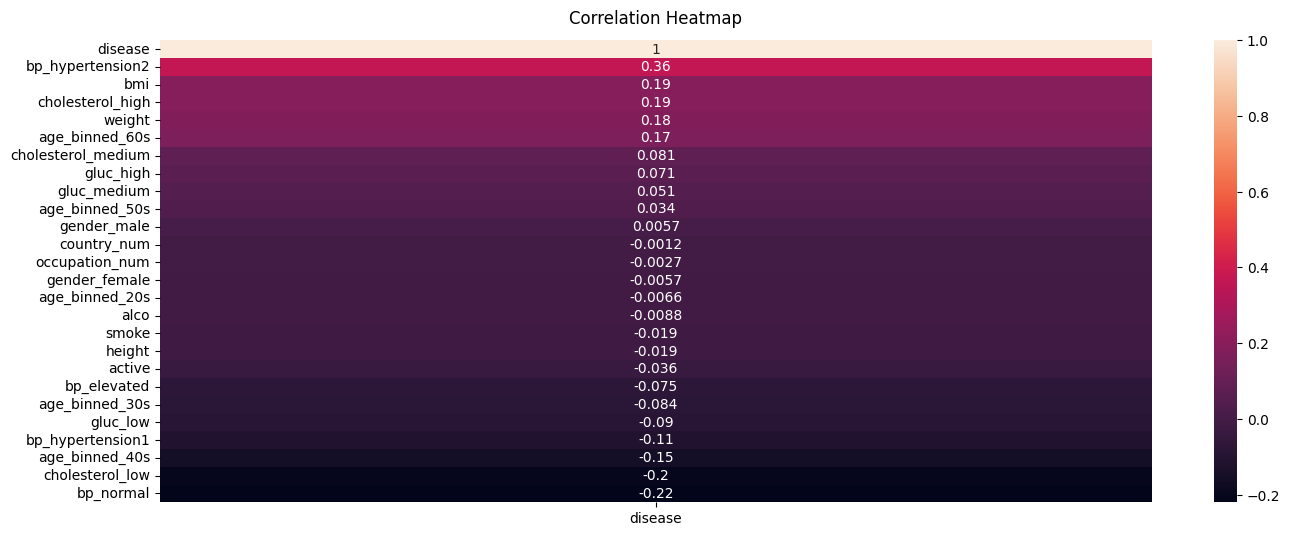

In [144]:
import seaborn as sns

iddate_removed_df = data_df.drop(columns=['id','date'])

plt.figure(figsize=(16, 6))

#heatmap = sns.heatmap(data_df.corr()[['gluc_low', 'gluc_medium', 'gluc_high']],
heatmap = sns.heatmap(iddate_removed_df.corr()[['disease']].sort_values(by=['disease'],ascending=False),
                      annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [145]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [146]:
# Feature Selection
#selected_df = iddate_removed_df
selected_df = iddate_removed_df[iddate_removed_df['age_binned_60s'] == 1]
#selected_df = iddate_removed_df.loc[(iddate_removed_df['age_binned_30s']==1) & (iddate_removed_df['disease'] == 1)]

X = selected_df.drop(columns=['disease'], axis = 1)
y = selected_df['disease']

In [147]:
#X.head(3)

In [148]:
X

,active,alco,height,smoke,weight,bmi,age_binned_20s,age_binned_30s,age_binned_40s,age_binned_50s,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,country_num,occupation_num
5,0,0,151,0,67.0,29.384676,0,0,0,0,...,0,1,0,1,0,0,1,0,0,4
6,1,0,157,0,93.0,37.729725,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
7,1,0,178,0,95.0,29.983588,0,0,0,0,...,1,0,1,0,0,1,0,0,1,2
10,1,0,169,0,80.0,28.010224,0,0,0,0,...,0,1,0,0,1,0,0,1,2,2
22,1,0,158,0,90.0,36.051915,0,0,0,0,...,0,1,0,1,0,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69970,0,1,173,1,103.0,34.414782,0,0,0,0,...,1,0,1,0,0,0,0,1,0,2
69973,1,0,175,0,72.0,23.510204,0,0,0,0,...,1,0,0,0,1,0,0,1,3,7
69979,1,0,163,0,74.0,27.852008,0,0,0,0,...,0,1,0,1,0,0,1,0,3,0
69988,1,0,160,0,59.0,23.046875,0,0,0,0,...,0,1,0,0,1,0,0,1,1,7


In [149]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [156]:
def doLogisticRegression(X, y):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

    lr = LogisticRegression(solver='liblinear', max_iter=50000)

    lr.fit(X_train, y_train)

    pred = lr.predict(X_test)

    report_dict = classification_report(y_test, pred, output_dict=True)
    report_df = pd.DataFrame.from_dict(report_dict)

    return report_df

    #accuracy = metrics.accuracy_score(pred, y_test)

    #print("The Accuracy of the logistic regression model is: ", accuracy*100, "%")

The Accuracy of the logistic regression model is:  69.12114014251782 %


In [151]:
def doKNNClassifier(X, y):
    from sklearn.neighbors import KNeighborsClassifier

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

    knn = KNeighborsClassifier(n_neighbors = 3)

    knn.fit(X_train, y_train)

    pred = knn.predict(X_test)

    #acc = metrics.accuracy_score(pred, y_test)

    #print("The accuracy of the KNN model is: ", acc*100, "%")

The accuracy of the KNN model is:  60.675640010556876 %


In [152]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [157]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.19      0.29      1255
           1       0.70      0.94      0.80      2534

    accuracy                           0.69      3789
   macro avg       0.66      0.56      0.54      3789
weighted avg       0.67      0.69      0.63      3789

[[ 234 1021]
 [ 149 2385]]


In [165]:
#report_dict = classification_report(y_test, pred, output_dict=True)
#report_df = pd.DataFrame.from_dict(report_dict)
#report_df = report_df.transpose()

#report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.610966,0.700235,0.691211,0.655600,0.670667
recall,0.186454,0.941200,0.691211,0.563827,0.691211
f1-score,0.285714,0.803030,0.691211,0.544372,0.631684
support,1255.000000,2534.000000,0.691211,3789.000000,3789.000000


In [166]:
#report_df1 = report_df

#merge_df = pd.concat([report_df, report_df1], axis=0)

#merge_df

,0,1,accuracy,macro avg,weighted avg
precision,0.610966,0.700235,0.691211,0.655600,0.670667
recall,0.186454,0.941200,0.691211,0.563827,0.691211
f1-score,0.285714,0.803030,0.691211,0.544372,0.631684
support,1255.000000,2534.000000,0.691211,3789.000000,3789.000000
precision,0.610966,0.700235,0.691211,0.655600,0.670667
recall,0.186454,0.941200,0.691211,0.563827,0.691211
f1-score,0.285714,0.803030,0.691211,0.544372,0.631684
support,1255.000000,2534.000000,0.691211,3789.000000,3789.000000


In [154]:
data_df

,date,id,active,alco,height,smoke,weight,disease,bmi,age_binned_20s,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,country_num,occupation_num
0,2021-05-03,0,1,0,168,0,62.0,0,21.967120,0,...,1,0,0,0,1,0,0,1,0,0
1,2021-08-05,1,1,0,156,0,85.0,1,34.927679,0,...,0,1,1,0,0,0,0,1,1,1
2,2022-11-13,2,0,0,165,0,64.0,1,23.507805,0,...,0,1,1,0,0,0,0,1,0,2
3,2018-10-31,3,1,0,169,0,82.0,1,28.710479,0,...,1,0,0,0,1,0,0,1,2,3
4,2020-09-25,4,0,0,156,0,56.0,0,23.011177,0,...,0,1,0,0,1,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2018-04-05,99992,1,0,165,0,80.0,1,29.384757,0,...,0,1,0,0,1,0,0,1,2,3
69995,2018-04-03,99993,1,0,168,1,76.0,0,26.927438,0,...,1,0,0,0,1,0,0,1,2,7
69997,2022-08-25,99996,0,1,183,0,105.0,1,31.353579,0,...,1,0,1,0,0,0,0,1,1,1
69998,2020-07-13,99998,0,0,163,0,72.0,1,27.099251,0,...,0,1,0,0,1,0,1,0,2,1


In [155]:
#data_df[data_df['bmi'] > 200]